In [74]:
#First import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Import CSV file

crime = pd.read_csv('KCPD_Crime_Data_2017_clean.csv')

moon = pd.read_csv('Moon_Data_2017_cleaned.csv')

In [76]:
#show the clean crime dataset
crime.head()

,Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,2017-10-04,16:00,690,Stealing All Other,221.0,400 W 58 ST,KANSAS CITY,64113,U,U,NaN,N,"400 W 58 ST\nKANSAS CITY 64113\n(39.022397, -9..."
1,2017-03-20,11:30,630,Stealing Shoplifting,332.0,3500 PROSPECT AV,KANSAS CITY,64127,NaN,NaN,NaN,N,3500 PROSPECT AV\nKANSAS CITY 64127\n
2,2017-01-15,2:35,1850,Possession of Drug E,422.0,N GREEN HILLS RD and NW OLD TIFFANY SPRINGS,KANSAS CITY,64152,B,M,23.0,N,N NW GREEN HILLS RD\nKANSAS CITY 64152\n
3,2017-01-05,11:40,1849,Possession/Sale/Dist,122.0,1100 TROOST AV,KANSAS CITY,64106,NaN,NaN,NaN,N,"1100 TROOST AV\nKANSAS CITY 64106\n(39.10068, ..."
4,2017-01-27,21:25,670,Stealing from Buildi,324.0,4800 E 24 ST,KANSAS CITY,64127,B,F,38.0,N,"4800 E 24 ST\nKANSAS CITY 64127\n(39.08209, -9..."


In [77]:
#show the clean moon dataset
moon.head()

,Date,Moon Phase,Illumination
0,1/1/17,Waxing Crescent,10%
1,1/2/17,Waxing Crescent,17%
2,1/3/17,Waxing Crescent,26%
3,1/4/17,Waxing Crescent,36%
4,1/5/17,First Quarter,47%


# Number of Days in Each Phase (chart #7)

In [78]:
#Group the days by moon phase to get the number of days the moon was in each phase
moon_phase_by_day = moon.groupby('Moon Phase')['Date'].nunique().reset_index()

moon_phase_by_day

,Moon Phase,Date
0,First Quarter,12
1,Full Moon,12
2,Last Quarter,12
3,New Moon,13
4,Waning Crescent,76
5,Waning Gibbous,77
6,Waxing Crescent,79
7,Waxing Gibbous,84


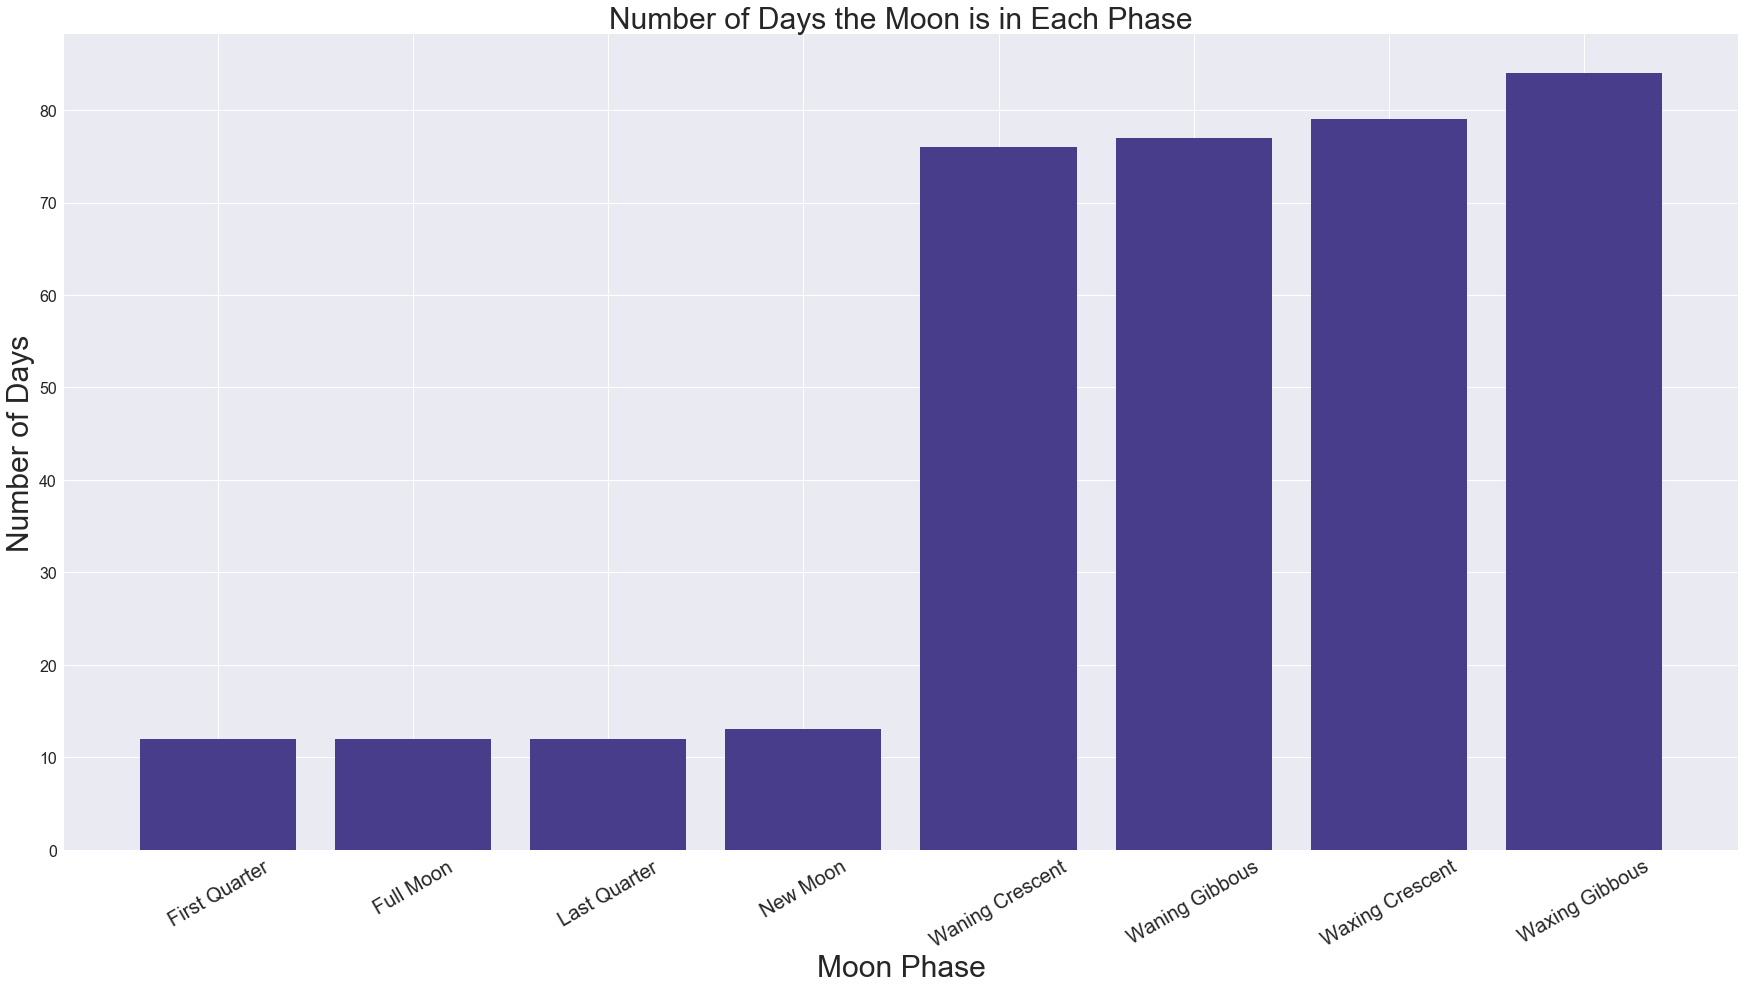

In [79]:
#Plot the number of days the moon is in each moon phase

#add labels and such
sns.set(style="darkgrid")
plt.title("Number of Days the Moon is in Each Phase", fontsize =30)
plt.xlabel("Moon Phase", fontsize=30)
plt.ylabel("Number of Days", fontsize =30)

x = moon_phase_by_day['Moon Phase']
y =moon_phase_by_day['Date']

plt.xticks(rotation=30,fontsize =20)
plt.yticks(fontsize =16)

crime_by_moonphase= plt.bar(x, y, color = "DarkSlateBlue")

fig = plt.gcf()
fig.set_size_inches(30,15)

sns.set(style="darkgrid")

#save an image of the plot to the output folder
plt.savefig('Pics/DaysInEachPhase.png')

#show plot
plt.show(crime_by_moonphase)

# Merge Data to Get Total Number of Crimes Per Moon Phase

In [80]:
#We need to merge data to get the otal number of crimes in each moon phase

#First we need to group the of crimes by  date in the crime dataset

crime_grouped_by_day = crime.groupby(['Date']).count().reset_index()

In [81]:
crime_grouped_by_day

,Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,2017-01-01,444,444,444,444,444,444,444,401,401,260,444,444
1,2017-01-02,341,341,341,341,341,341,341,278,278,180,341,341
2,2017-01-03,315,319,319,315,319,319,319,277,277,159,319,319
3,2017-01-04,302,302,302,301,302,302,302,260,260,154,302,302
4,2017-01-05,264,264,264,264,264,264,264,222,222,142,264,264
5,2017-01-06,282,282,282,282,282,282,282,238,238,150,282,282
6,2017-01-07,302,302,302,302,302,302,302,265,265,165,302,302
7,2017-01-08,243,243,243,240,243,243,243,221,221,140,243,243
8,2017-01-09,431,431,431,431,431,431,431,372,372,230,431,431
9,2017-01-10,384,384,384,384,384,384,384,331,331,212,384,384


In [82]:
#Let's drop columns

crime_grouped_by_day = crime_grouped_by_day.drop(columns=['Description',
                                                          'Beat',
                                                          'Address',
                                                          'City',
                                                          'Zip Code',
                                                          'Race',
                                                          'From_Time',
                                                          'Sex',
                                                          'Age',
                                                          'Firearm Used Flag',
                                                          'Location'])
                                                        
                                                          

In [83]:
crime_grouped_by_day

,Date,Offense
0,2017-01-01,444
1,2017-01-02,341
2,2017-01-03,319
3,2017-01-04,302
4,2017-01-05,264
5,2017-01-06,282
6,2017-01-07,302
7,2017-01-08,243
8,2017-01-09,431
9,2017-01-10,384


In [84]:
moon['Date']= pd.to_datetime(moon['Date'])

In [100]:
moon

,Date,Moon Phase,Illumination
0,2017-01-01,Waxing Crescent,10%
1,2017-01-02,Waxing Crescent,17%
2,2017-01-03,Waxing Crescent,26%
3,2017-01-04,Waxing Crescent,36%
4,2017-01-05,First Quarter,47%
5,2017-01-06,Waxing Gibbous,58%
6,2017-01-07,Waxing Gibbous,69%
7,2017-01-08,Waxing Gibbous,79%
8,2017-01-09,Waxing Gibbous,88%
9,2017-01-10,Waxing Gibbous,94%


In [101]:
moon.isnull().sum()

crime_grouped_by_day.isnull().sum()

Date       0
Offense    0
dtype: int64

In [102]:
#NOW IT'S TIME TO MERGE!

total_crimes_per_moonphase = pd.merge(moon,crime_grouped_by_day, on='Date', how='right')

In [54]:
total_crimes_per_moonphase

,Date,Moon Phase,Illumination,Offense
0,1/1/17,Waxing Crescent,10%,NaN
1,1/2/17,Waxing Crescent,17%,NaN
2,1/3/17,Waxing Crescent,26%,NaN
3,1/4/17,Waxing Crescent,36%,NaN
4,1/5/17,First Quarter,47%,NaN
5,1/6/17,Waxing Gibbous,58%,NaN
6,1/7/17,Waxing Gibbous,69%,NaN
7,1/8/17,Waxing Gibbous,79%,NaN
8,1/9/17,Waxing Gibbous,88%,NaN
9,1/10/17,Waxing Gibbous,94%,NaN


In [ ]:
#Plot the total number of crimes in each moon phase and add labels and such
sns.set(style="darkgrid")
plt.title("Number of Days the Moon is in Each Phase", fontsize =30)
plt.xlabel("Moon Phase", fontsize=30)
plt.ylabel("Number of Days", fontsize =30)

x = moon_phase_by_day['Moon Phase']
y =moon_phase_by_day['Date']

plt.xticks(rotation=30,fontsize =20)
plt.yticks(fontsize =16)

crime_by_moonphase= plt.bar(x, y, color = "DarkSlateBlue")

fig = plt.gcf()
fig.set_size_inches(30,15)

sns.set(style="darkgrid")

#save an image of the plot to the output folder
plt.savefig('Pics/DaysInEachPhase.png')

#show plot
plt.show(crime_by_moonphase)